# Import and data type correction
> Importing libraries and correcting datatypes of the data columns


In [1]:
import os
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
import pickle
import glob
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

drive.mount('/content/gdrive/', force_remount=True)
os.chdir("/content/gdrive/Shareddrives/STA 221/data")

Mounted at /content/gdrive/


6271.12 sec Train
RMSE: 0.1885
Mean Absolute Error (MAE): 0.1388
Mean Squared Error (MSE): 0.0355
R² Score: 0.6665


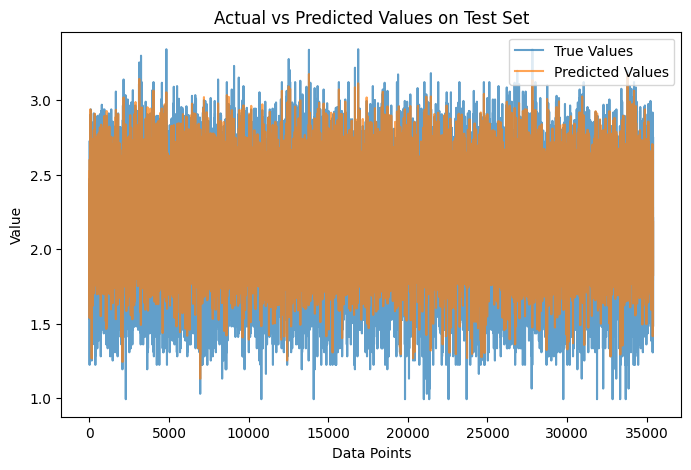

In [2]:
# Load data (assuming this step is already done in your original code)
X = pd.read_csv("train_knn_imputed_final_with_1hot_encoding.csv", low_memory=False)
y = X['bg+1:00']
X = X.drop(columns=['id', 'p_num', 'time', 'bg+1:00', 'datetime'])
# activity_columns = [col for col in X.columns if col.startswith('activity')]
# X = X.drop(columns=activity_columns)

random_forest = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=25, n_jobs=-1)
model = random_forest

# Split data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Train the model and record time taken
start_time = time.time()
model.fit(X_train, y_train)
train_time = round(time.time() - start_time, 2)
print(f'{train_time} sec Train')

# Predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

# Additional metrics: MAE, MSE, R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs Predicted Values
plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='True Values', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', alpha=0.7)
plt.title('Actual vs Predicted Values on Test Set')
plt.xlabel('Data Points')  # Updated from 'Samples' to 'Data Points'
plt.ylabel('Value')
plt.legend()
plt.show()